In [ ]:
from google.colab import drive


In [ ]:
drive.mount('/gdrive', force_remount=True)
%cd /gdrive
%ls
%cd 'My Drive'/

Mounted at /gdrive
/gdrive
MyDrive/
/gdrive/My Drive


In [ ]:
%ls

 A20201028048.pdf            message.txt
 A20201120035.pdf           'Numérisation document depuis FP040028 (1).pdf'
'Colab Notebooks'/          'Numérisation document depuis FP040028.pdf'
 datacamp/                  'Oral anglais.docx'
'Document sans titre.gdoc'   P1000755.JPG
'Exeat Camille (ENC).pdf'   'projet ingé'/
'groupes BDD.gsheet'        'Rapport 2.docx'
 matrix.zip                 'Résultas Bac Camille.pdf'
 message.gdoc               'tai grislin ngatchou.pptx'


In [ ]:
%cd 'datacamp'

/gdrive/My Drive/datacamp


In [ ]:
%ls

chest_xray/


In [ ]:
%cd 'chest_xray'

/gdrive/My Drive/datacamp/chest_xray


In [ ]:
%ls

model_ML.h5  test/  train/


In [ ]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
#from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

%matplotlib inline

In [ ]:
train_path = 'train'
test_path = 'test'

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

valid_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(224, 224),
        batch_size=10,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(224, 224),
        batch_size=10,
        class_mode='categorical')

Found 5272 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


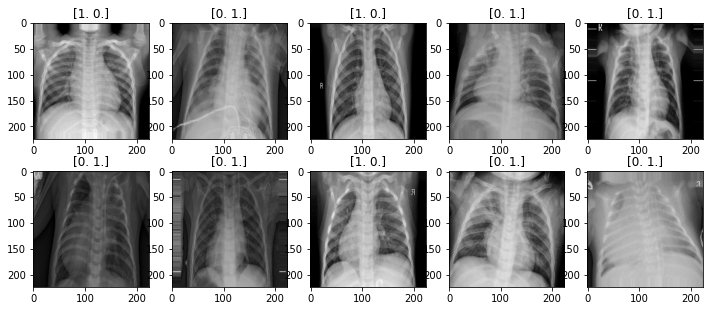

In [ ]:
photos, labels = next(iter(train_generator))

plt.figure(figsize=(12, 5))

for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(photos[i])
  plt.title(labels[i])

In [ ]:
test_images, test_labels = next(iter(test_generator))

In [ ]:
bin_test_labels = test_labels[:, 0]

In [ ]:
bin_test_labels

array([0., 1., 0., 0., 1., 1., 0., 1., 1., 0.], dtype=float32)

In [ ]:
from keras.applications.vgg19 import VGG19

In [ ]:
vgg19_model = VGG19(include_top=False, input_shape=(224, 224, 3))

In [ ]:
vgg19_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
for layer in vgg19_model.layers[:-6]:
  layer.trainable = False

In [ ]:
vgg19_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
for layer in vgg19_model.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f13cb1dbfd0> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f13cb18a990> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f13cb110550> False
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f13cb110610> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f13c5391910> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f13c539ac10> False
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f13c539ad90> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f13c539d310> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f13c539d910> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f13c53b1350> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f13c53a82d0> False
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f13c533f210> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f13c534df50> False
<keras.layers.convolut

In [ ]:
model = Sequential()

In [ ]:
model.add(vgg19_model)

In [ ]:
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 1024)              25691136  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 2)                 2050      
                                                                 
Total params: 45,717,570
Trainable params: 35,132,418
Non-trainable params: 10,585,152
_________________________________________________________________


In [ ]:
model.compile(optimizer=Adam(lr=0.0001), loss=categorical_crossentropy, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit_generator(train_generator, 
                    steps_per_epoch=10, 
                    validation_steps=10,
                    verbose=2,
                    epochs=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/10
10/10 - 81s - loss: 1.0929 - accuracy: 0.5700 - 81s/epoch - 8s/step
Epoch 2/10
10/10 - 80s - loss: 0.4619 - accuracy: 0.7500 - 80s/epoch - 8s/step
Epoch 3/10
10/10 - 95s - loss: 0.3866 - accuracy: 0.8700 - 95s/epoch - 10s/step
Epoch 4/10
10/10 - 78s - loss: 0.3270 - accuracy: 0.8500 - 78s/epoch - 8s/step
Epoch 5/10
10/10 - 78s - loss: 0.2540 - accuracy: 0.8800 - 78s/epoch - 8s/step
Epoch 6/10
10/10 - 79s - loss: 0.2105 - accuracy: 0.9100 - 79s/epoch - 8s/step
Epoch 7/10
10/10 - 81s - loss: 0.1287 - accuracy: 0.9400 - 81s/epoch - 8s/step
Epoch 8/10
10/10 - 78s - loss: 0.2927 - accuracy: 0.8800 - 78s/epoch - 8s/step
Epoch 9/10
10/10 - 80s - loss: 0.1755 - accuracy: 0.9300 - 80s/epoch - 8s/step
Epoch 10/10
10/10 - 79s - loss: 0.2635 - accuracy: 0.9000 - 79s/epoch - 8s/step


In [ ]:
predictions = model.predict_generator(test_generator,
                                      steps=100,
                                      use_multiprocessing=True,
                                      verbose=1,)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  after removing the cwd from sys.path.


100/100 [==============================] - 585s 6s/step


In [ ]:
model.predict_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


array([[4.6765059e-03, 9.9532348e-01],
       [9.2089413e-06, 9.9999076e-01],
       [1.5734066e-05, 9.9998420e-01],
       ...,
       [4.2365644e-02, 9.5763439e-01],
       [7.6758933e-01, 2.3241067e-01],
       [9.8380107e-01, 1.6198957e-02]], dtype=float32)

In [ ]:
model.evaluate(test_generator)

63/63 [==============================] - 360s 6s/step - loss: 0.5040 - accuracy: 0.8574


[0.5040027499198914, 0.8573718070983887]

In [ ]:
model.save('model_ML.h5')